In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()
y = boston.target
bos = pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price'] = y
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
import statsmodels.api as sm
y = bos['price']
x = bos.drop('price',axis=1)
Xc = sm.add_constant(x)
Xc.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          6.72e-135
Time:                        10:11:04   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Backward Elimination

Removes variables one by one based on the probability

In [9]:
Xc = sm.add_constant(x)
cols = list(Xc.columns)
while len(cols)>1:
    Xc = Xc[cols]
    model = sm.OLS(y, Xc).fit()
    p = model.pvalues
    pmax = max(p)
    pid = p.idxmax()
    if pmax>0.5:
        cols.remove(pid)
        print(pid,pmax)
    else:
        break
cols

AGE 0.958229309205775
INDUS 0.7379887092915145


['const',
 'CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [11]:
Xc = Xc[cols]
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          5.54e-137
Time:                        10:18:09   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
Xc.columns

Index(['const', 'CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [13]:
bos.to_csv('boston.csv', index=False)

In [16]:
y_est = model.predict(Xc)
y_est

0      30.124281
1      24.996528
2      30.533370
3      28.647995
4      27.982641
         ...    
501    23.537900
502    22.380817
503    27.609999
504    26.111333
505    22.340843
Length: 506, dtype: float64

In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_est)
rmse = np.sqrt(mse)
rmse

4.679735971158222

In [21]:
df = pd.read_csv('airline cost new.csv')
df.head()

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480


## Test of Assumptions - Boston House Price - STAT

In [22]:
import statsmodels.api as sm
y = bos['price']
x = bos.drop(['price','INDUS','AGE'],axis=1)
Xc = sm.add_constant(x)
Xc.head()

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
model = sm.OLS(y, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          5.54e-137
Time:                        11:50:33   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Assumption - Normality of Residuals

In [28]:
plt.rcParams['figure.figsize']=[15,6]

In [29]:
residuals = model.resid
residuals

0      -6.124281
1      -3.396528
2       4.166630
3       4.752005
4       8.217359
         ...    
501    -1.137900
502    -1.780817
503    -3.709999
504    -4.111333
505   -10.440843
Length: 506, dtype: float64

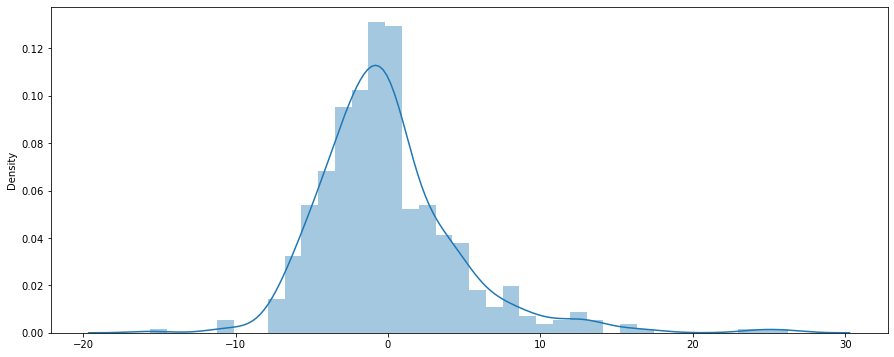

In [30]:
sns.distplot(residuals)
plt.show()

### Q-Q plot

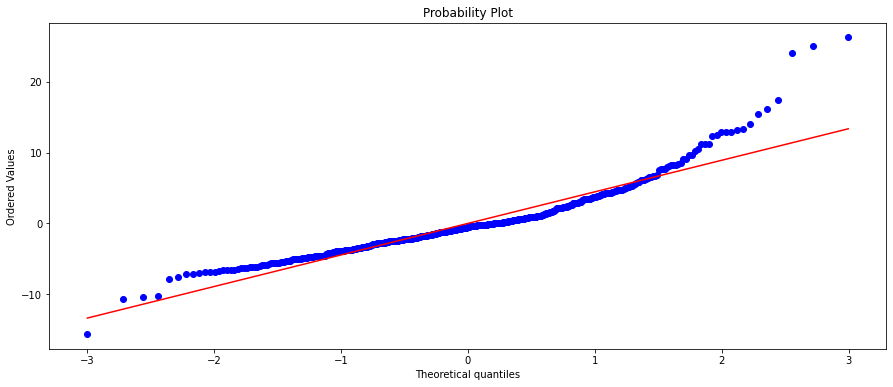

In [31]:
import scipy.stats as stats 
stats.probplot(residuals,plot=plt)
plt.show()

In [35]:
stats.norm.ppf(0.25,loc=50,scale=10)

43.255102498039186

### Testing for Normality

In [37]:
stats.jarque_bera(residuals)

Jarque_beraResult(statistic=787.7851418746311, pvalue=0.0)

In [38]:
lny = np.log(y)
model = sm.OLS(lny, Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          4.31e-159
Time:                        12:16:26   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

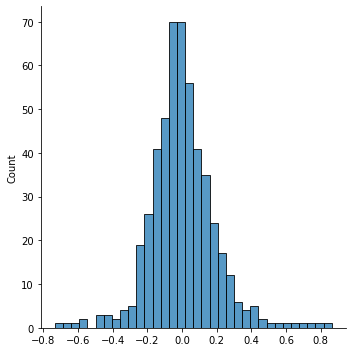

In [41]:
residuals = model.resid
sns.displot(residuals)
plt.show()

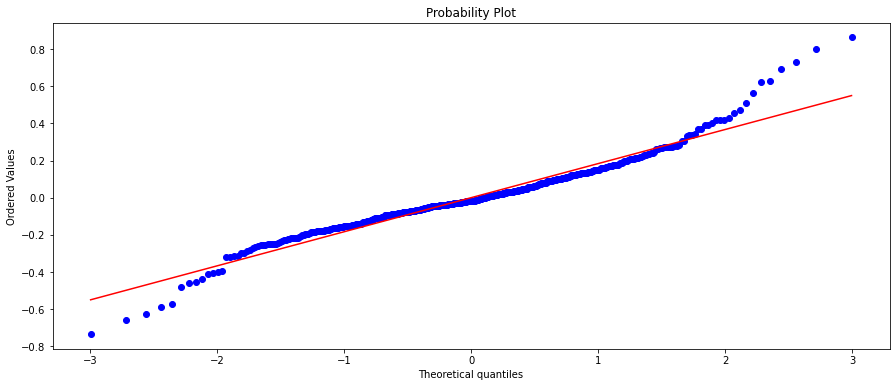

In [42]:
stats.probplot(residuals,plot=plt)
plt.show()

In [43]:
stats.jarque_bera(residuals)

Jarque_beraResult(statistic=227.3607352266412, pvalue=0.0)

## Assumptions-2 : Residuals are Homescedastic (constant variable)

In [44]:
import statsmodels.api as sm
y = bos['price']
x = bos.drop(['price','INDUS','AGE'],axis=1)
Xc = sm.add_constant(x)
Xc.head()

model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):          5.54e-137
Time:                        12:38:51   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

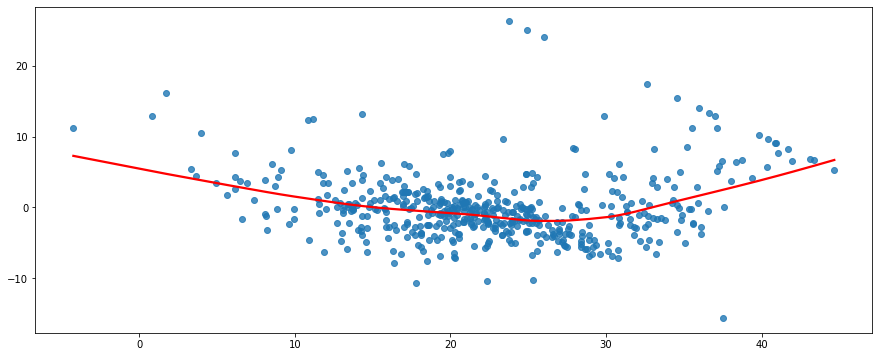

In [46]:
residuals = model.resid
y_pred = model.predict(Xc)
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color':'red'})
plt.show()

### Goldfeldt Quant Test

In [47]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(y=residuals, x=Xc)

(2.2836707086343973, 1.3454126630538348e-10, 'increasing')

## Assumption-3: No Autocorrelation among residuals

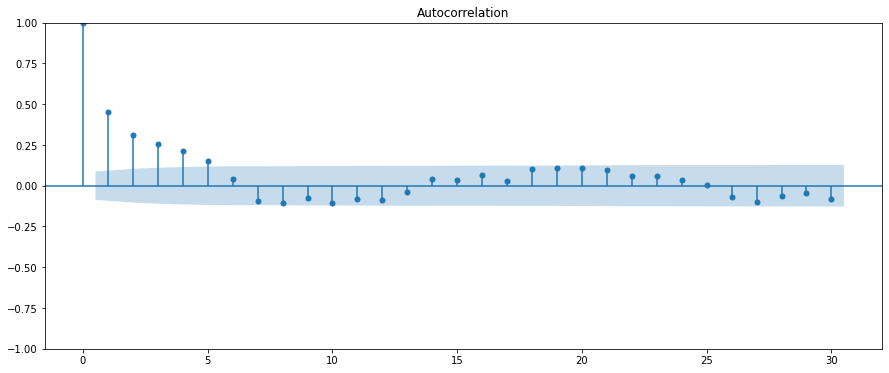

In [49]:
import statsmodels.tsa.api as smt
residuals = model.resid
smt.graphics.plot_acf(residuals, lags=30)
plt.show()

## Assumption-4 : No Multicollinearity among Independent Variables

In [53]:
x2 = bos.drop('price', axis=1)
x2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


<AxesSubplot:>

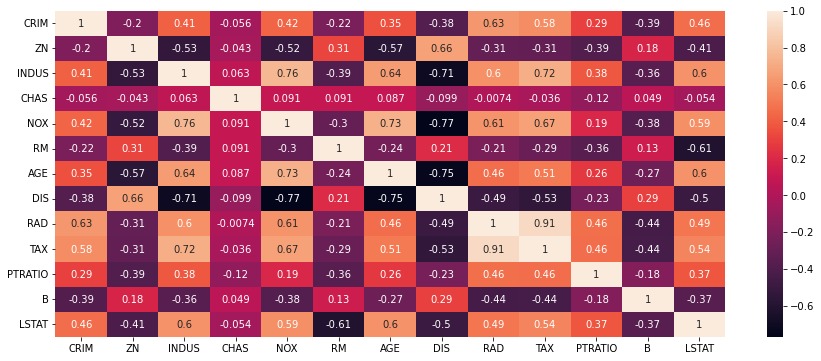

In [54]:
sns.heatmap(x2.corr(),annot=True)

### Variance Inflation Factor(VIF)

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

x2c = sm.add_constant(x2)

vif = [VIF(x2c.values, i) for i in range(x2c.shape[1])]
pd.DataFrame(vif, index=x2c.columns, columns=['VIF'])

,VIF
const,579.255845
CRIM,1.789704
ZN,2.239229
CHAS,1.059819
NOX,3.778011
RM,1.834806
DIS,3.443420
RAD,6.861126
TAX,7.272386
PTRATIO,1.757681


## Assumption-5: Linearity of Relationship

In [60]:
import statsmodels.api as sm
y = bos['price']
x = bos.drop(['price','INDUS','AGE'],axis=1)
Xc = sm.add_constant(x)
model = sm.OLS(y,Xc).fit()


<AxesSubplot:ylabel='price'>

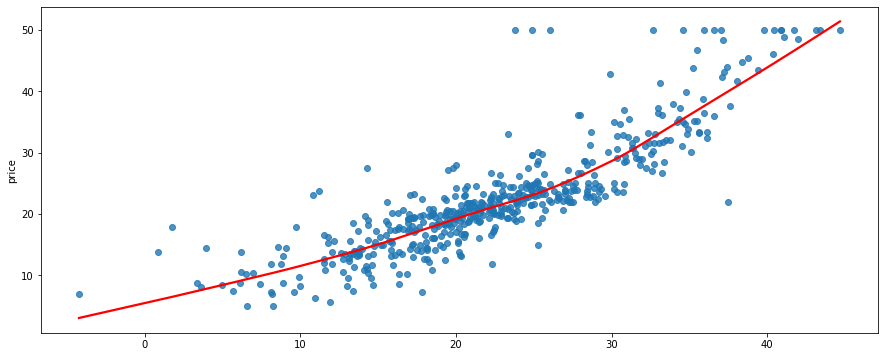

In [62]:
y_est = model.predict(Xc)
sns.regplot(x=y_est, y=y, lowess=True, line_kws={'color':'red'})

### Rainbow Test:

In [64]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model)

(0.5781612495333298, 0.9999908142705343)